In [0]:
!pip3 install torch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets


In [3]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [4]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

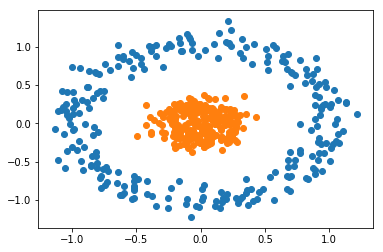

In [5]:
scatter_plot()

In [6]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else: 
      return 0

In [7]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [8]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [9]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 0.7148522138595581
epoch: 1 loss 0.6947312355041504
epoch: 2 loss 0.6955161094665527
epoch: 3 loss 0.7014896869659424
epoch: 4 loss 0.7013992667198181
epoch: 5 loss 0.697472095489502
epoch: 6 loss 0.6939275860786438
epoch: 7 loss 0.6928625106811523
epoch: 8 loss 0.693941593170166
epoch: 9 loss 0.6954426169395447
epoch: 10 loss 0.6958809494972229
epoch: 11 loss 0.6949241757392883
epoch: 12 loss 0.693157970905304
epoch: 13 loss 0.6914014220237732
epoch: 14 loss 0.6901755332946777
epoch: 15 loss 0.6894776225090027
epoch: 16 loss 0.6888664364814758
epoch: 17 loss 0.6877952814102173
epoch: 18 loss 0.6859349608421326
epoch: 19 loss 0.6832882165908813
epoch: 20 loss 0.6800878047943115
epoch: 21 loss 0.6766111254692078
epoch: 22 loss 0.6730254888534546
epoch: 23 loss 0.6693330407142639
epoch: 24 loss 0.6653968095779419
epoch: 25 loss 0.661038875579834
epoch: 26 loss 0.6561349034309387
epoch: 27 loss 0.6506633758544922
epoch: 28 loss 0.6446858048439026
epoch: 29 loss 0.63828414678

epoch: 278 loss 0.010657032020390034
epoch: 279 loss 0.010602587834000587
epoch: 280 loss 0.010548612102866173
epoch: 281 loss 0.010495088063180447
epoch: 282 loss 0.010442023165524006
epoch: 283 loss 0.010389418341219425
epoch: 284 loss 0.01033725030720234
epoch: 285 loss 0.01028552744537592
epoch: 286 loss 0.010234236717224121
epoch: 287 loss 0.010183371603488922
epoch: 288 loss 0.010132931172847748
epoch: 289 loss 0.010082898661494255
epoch: 290 loss 0.010033290833234787
epoch: 291 loss 0.009984081611037254
epoch: 292 loss 0.009935272857546806
epoch: 293 loss 0.00988686177879572
epoch: 294 loss 0.009838847443461418
epoch: 295 loss 0.009791214019060135
epoch: 296 loss 0.00974397361278534
epoch: 297 loss 0.009697094559669495
epoch: 298 loss 0.009650606662034988
epoch: 299 loss 0.009604478254914284
epoch: 300 loss 0.00955871306359768
epoch: 301 loss 0.009513316676020622
epoch: 302 loss 0.009468271397054195
epoch: 303 loss 0.009423571638762951
epoch: 304 loss 0.00937922578305006
epoch: 

epoch: 552 loss 0.003881212091073394
epoch: 553 loss 0.003870743326842785
epoch: 554 loss 0.003860312281176448
epoch: 555 loss 0.0038499338552355766
epoch: 556 loss 0.003839609446004033
epoch: 557 loss 0.003829328343272209
epoch: 558 loss 0.003819092409685254
epoch: 559 loss 0.003808903507888317
epoch: 560 loss 0.0037987635005265474
epoch: 561 loss 0.003788667730987072
epoch: 562 loss 0.0037786259781569242
epoch: 563 loss 0.003768626367673278
epoch: 564 loss 0.0037586691323667765
epoch: 565 loss 0.0037487568333745003
epoch: 566 loss 0.0037388924974948168
epoch: 567 loss 0.003729073563590646
epoch: 568 loss 0.0037193000316619873
epoch: 569 loss 0.003709564683958888
epoch: 570 loss 0.003699876833707094
epoch: 571 loss 0.003690231591463089
epoch: 572 loss 0.0036806289572268724
epoch: 573 loss 0.0036710731219500303
epoch: 574 loss 0.0036615568678826094
epoch: 575 loss 0.003652089973911643
epoch: 576 loss 0.0036426580045372248
epoch: 577 loss 0.003633269341662526
epoch: 578 loss 0.003623925

epoch: 833 loss 0.002111406298354268
epoch: 834 loss 0.002107646781951189
epoch: 835 loss 0.002103892620652914
epoch: 836 loss 0.0021001475397497416
epoch: 837 loss 0.002096415963023901
epoch: 838 loss 0.002092696726322174
epoch: 839 loss 0.0020889854058623314
epoch: 840 loss 0.0020852868910878897
epoch: 841 loss 0.002081598388031125
epoch: 842 loss 0.0020779194310307503
epoch: 843 loss 0.002074251649901271
epoch: 844 loss 0.0020705917850136757
epoch: 845 loss 0.002066947054117918
epoch: 846 loss 0.002063307212665677
epoch: 847 loss 0.002059679012745619
epoch: 848 loss 0.002056065248325467
epoch: 849 loss 0.0020524554420262575
epoch: 850 loss 0.0020488586742430925
epoch: 851 loss 0.0020452733151614666
epoch: 852 loss 0.002041695173829794
epoch: 853 loss 0.0020381317008286715
epoch: 854 loss 0.002034574979916215
epoch: 855 loss 0.0020310261752456427
epoch: 856 loss 0.0020274922717362642
epoch: 857 loss 0.002023963024839759
epoch: 858 loss 0.0020204433239996433
epoch: 859 loss 0.00201693

Text(0.5,0,'epoch')

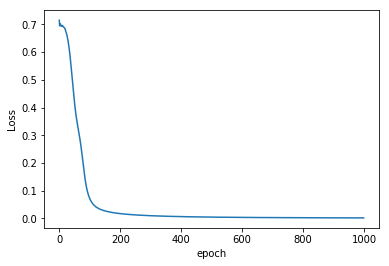

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [11]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

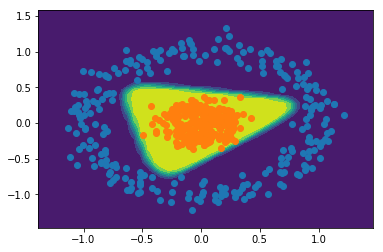

In [12]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


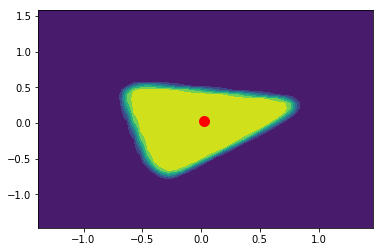

In [13]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(X, y)